<h1 style="text-align:center;">Nerve Quadrature Analysis</h1>
<h3 style="text-align:center;margin:0;">Vijay Stroup</h3>
<p style="text-align:center;margin:0;">University of Central Florida • November 6, 2021</p>

# Introduction

In a study conducted by John Cahn, John Mallet-Paret, and Erik van Vleck on 
["Traveling Wave Solutions for Systems of ODEs on a Two-Dimensional Spatial Lattice"](http://www.jstor.org/stable/118432), 
they have deduced an function $\psi$ to represent a impuluse in the human nervious 
system. 

Consider the function $\psi: \mathbb{R}\rightarrow\mathbb{R}$

$$
\psi(x) =
\frac{1}2 + \frac{1}\pi \int_0^\infty \frac{A(s)sin(sx)}{s(A(s)^2 + c^2s^2)} ds +
\frac{c}\pi \int_0^\infty \frac{cos(sx)}{A(s)^2 + c^2s^2} ds
$$

$$ A(s) = 1 + 2(1 - cos(s)) $$

$\psi$ is the wave function representation of We can use different methods of 
integration to estimate $\psi$ at different values of x and c.  

The methods of quadrature approximation that will be used in this project will 
be the following:  
<br/>
Midpoint: $$\int_a^b f(x) dx \approx (b-a)f(\frac{b+a}2)$$  
<br/>
Trapezoidal: $$\int_a^b f(x) dx \approx \frac{b-a}2 (f(a)+f(b)$$  
<br/>
Simpson: $$\int_a^b f(x) dx \approx \frac{h}3 (f(a) + 4f(a+h) + f(a+2h)), \qquad h=\frac{b-a}2$$  
<br/>

In genearl, we can write a quadrature formula as
$$\int_a^b f(x)dx \approx \sum_{i=1}^n w_i f(x_i)$$
where we want to choose weights $w_i$ and nodes so that the formula is as accurate as possible.

When doing quadrature analysis, we run into the problem of not knowing what the 
exact integral will be when comparing for error. Thus, we must use specific 
algorithms that do not require a compairson of the exact answer.  

For the Midpoint rule, we can use same as trapezoidal but coef is different

<br/>

For The Trapezoidal rule, we can use Richardson's Error Estimate to determine
how accurate each iteration is. Richardson's Error Estimate is defined as:
$$|\int_a^b f(x) dx - T_n| \leq \frac{h^2}{12} (b-a) \max_{x \in [a,b]} |f''(x)|$$  

<br/>

For Simpson's rule, we can use the error term defined as:
$$-\frac{1}{90} (\frac{b-a}2)^5 f^{(4)}(\epsilon)$$

I believe that Simpson's Rule will be more accurate when estimaing what this function should be. It will also be able to be more accurate with many less nodes than required by the trapezodial rule. This is shown by calculating the number of nodes needed to achieve a certain error for both methods. While the midpoint rule only requires the two end nodes, it can can be highly inaccurate as we will see later in the error analysis.

For our function $\psi$, it is reasonable to vary c within the interval [0, 10] 
and then choose values of x that will capture a good amount of data without 
sacrificing a lot of time. This can be done by checking, on each iteration, the
result relative to the previous iteration and cutting it off after a certain
threshold.  

Things to think about when analyzing this problem are:
- Our limits of integration are from 0 to $\infty$, what would be a good cut off point for
    our upper bound?
- What happens we set c=0 which is still in our acceptable range? It would make
    the third term of $\psi$ go to 0.
- Compounding error on each iteration?

# Analyis

We can first start off by visualizing the second and third integrand functions.  
We can see both of them have the trigonometric functions sin and cos so we should 
expect the plots to be bounded to 1 and have some type of damping effect with a
maximum at x=0.

In [14]:
# import all libraries needed for this project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
import warnings

warnings.filterwarnings('ignore') # ignore warnings from scipy integrate to inf
%matplotlib inline

In this analysis, I1 will be refered to as the integrand in the second term in $\psi$:
$$\frac{A(s)sin(sx)}{s(A(s)^2 + c^2s^2)}$$  

Conversely, I2 is the integrand in the third term of $\psi$:
$$\frac{cos(sx)}{A(s)^2 + c^2s^2}$$  

In [36]:
A = lambda s: 1 + 2 * (1 - np.cos(s)) # A(s)
I1 = lambda s, c, x: (A(s) * np.sin(s*x)) / (s * (A(s)**2 + c**2 * s**2))
I2 = lambda s, c, x: np.cos(s*x) / (A(s)**2 + c**2 * s**2)

def integral_plots(xs, c, x):
    I1_values = [I1(i, c, x) for i in xs]
    I2_values = [I2(i, c, x) for i in xs]

    _, ax = plt.subplots(1, 2)

    ax[0].plot(xs, I1_values)
    ax[0].set_title('I1')
    ax[0].set_xlabel('s')
    ax[0].set_ylabel('value')

    ax[1].plot(xs, I2_values)
    ax[1].set_title('I2')
    ax[1].set_xlabel('s')
    ax[1].set_ylabel('value')

    plt.subplots_adjust(wspace=.5)
    plt.show()



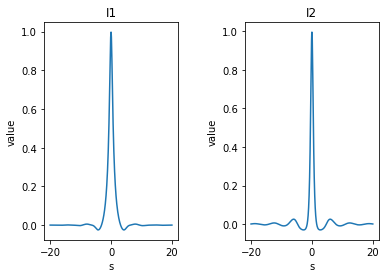

In [19]:
xs = np.linspace(-20, 20, 500)
c, x = 1, 1
integral_plots(xs, c, x)

Here we observe I1 and I2 with x and x being set to 1. They have a maximum at s=0
and dampen symmetrically moving away from s=0.  

We can then vary these parameters to see how it affects our function.

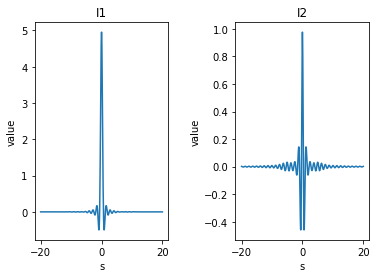

In [24]:
xs = np.linspace(-20, 20, 500)
c, x = 1, 5
integral_plots(xs, c, x)

We can easily see that increasing the value of x yeilds a higher frequency.

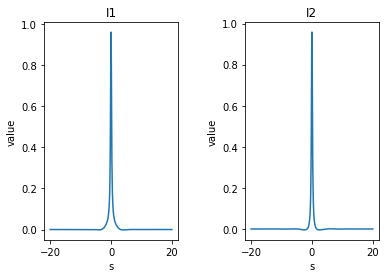

In [25]:
xs = np.linspace(-20, 20, 500)
c, x = 5, 1
integral_plots(xs, c, x)

When we increase c while keeping x constant, the dampening effect happens more harshly.

Now that we have observed these transformations, we can view the extremas of our
intervals.

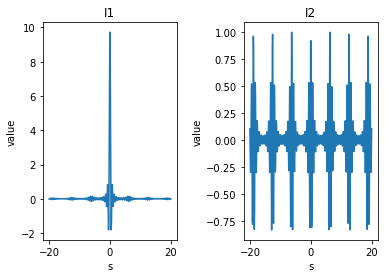

In [31]:
xs = np.linspace(-20, 20, 500)
c, x = 0, 10
integral_plots(xs, c, x)

When setting c to 0 for $\psi$, we know the third term will equal 0 so the high
fluctuations of I2 will not be considered. What is good to note is that for I1,
the value has a maximum still at 0, however falls off very quickly as s increases.

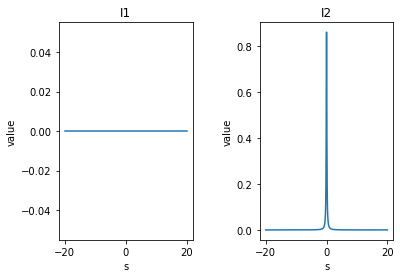

In [28]:
xs = np.linspace(-20, 20, 500)
c, x = 10, 0
integral_plots(xs, c, x)

In the case of x=0, I1 will always be equal to 0 due to $sin(x)$, and I2 will 
quickly go to 0 with no dampening effect.

We can now visualize $\psi(x),\quad x\in[-10, 10]$ to get a better picture 
of what to expect from our approximations.  
We will just use the basic quad method from scipy to use as visualization of $\psi$.

In [43]:
c = 1

xs = np.linspace(-5, 5, 1000)
vals = []
for x in xs:
    I1_val, _ = quad(I1, 0, np.inf, args=(x, c))
    I2_val, _ = quad(I2, 0, np.inf, args=(x, c))
    val = 1/2 + (1/np.pi * I1_val) + (c/np.pi * I2_val)
    vals.append(val)

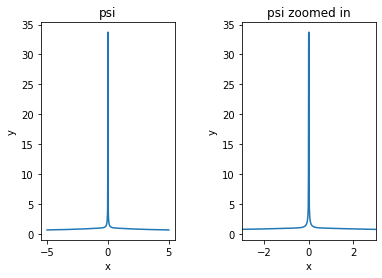

In [44]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(xs, vals)
ax[0].set_title('psi')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].plot(xs, vals)
ax[1].set_title('psi zoomed in')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_xlim(-3, 3)

plt.subplots_adjust(wspace=.5)
plt.show()